# Introduction to Vectors and Matrices for Fluid Mechanics

Welcome to the introductory notebook on numerical techniques and algebraic manipulations essential for advanced fluid mechanics. This notebook provides a foundation in linear algebra and numerical methods that you'll build upon in later sessions.

## Topics Covered

- **Vectors and Matrices:**  
  Basic definitions, creation, and manipulation using Python's NumPy library.

- **Array Generation:**  
  Utilizing `linspace` and `logspace` to generate equispaced and logarithmically spaced vectors.

- **Matrix Indexing:**  
  Accessing specific rows, columns, and submatrices.

- **Elementary Operations:**  
  Performing vector addition, dot products, cross products, and matrix transposition.

- **Matrix Operations:**  
  Demonstrating standard matrix multiplication, element-wise operations, double inner products, and constructing identity matrices.

- **Linear Algebra Fundamentals:**  
  An overview of determinants, trace, inverses, and a brief look at eigenvalue problems.

- **Advanced handling of arrays and matrices:**  
  Block matrices, concatenation, reshape, flatten, etc.

  
This notebook is designed to equip you with essential tools for numerical computations in fluid mechanics. Let’s get started!

We first load the package `numpy` (please visit https://numpy.org/ for more information) and use the *nickname* `np` when needed:

In [1]:
import numpy as np

#### Basic vector definition

In [2]:
# Define a vector
v = np.array([1, 2, 3, -3, -2, -1])
print("Vector v:", v)

Vector v: [ 1  2  3 -3 -2 -1]


In [3]:
# Alternatively, use a loop to display each index and value (mind indentation after the for):
for i, value in enumerate(v):
    print(f"v[{i}] = {value}")

v[0] = 1
v[1] = 2
v[2] = 3
v[3] = -3
v[4] = -2
v[5] = -1


Have a look at how dimensions are handled in Python:

In [4]:
print(v.size)
print(len(v))
print(v.shape)

6
6
(6,)


#### Alternative generation of vectors using `linspace` and `logspace`:

- We will create an equi-spaced vector $\vec{v} = (x_o, \ldots, x_N)$, where $x_i = x_o + i \Delta x$ using `linspace`
- We can also create a vector that is logarithmically spaced, i.e., the elements $10^{x_i}$ is equispaced. 


In [5]:
# linspace: Generates 10 numbers linearly spaced between 1 and 10
linear_vector = np.linspace(1, 10, 10)
print("Linearly spaced vector (linspace):")
print(linear_vector)

# logspace: Generates 10 numbers logarithmically spaced between 10^-1 and 10^2
log_vector = np.logspace(-1, 2, 10)
print("\nLogarithmically spaced vector (logspace) rounded to three decimals:")
print(np.round(log_vector, 3))

Linearly spaced vector (linspace):
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]

Logarithmically spaced vector (logspace) rounded to three decimals:
[  0.1     0.215   0.464   1.      2.154   4.642  10.     21.544  46.416
 100.   ]


Although this session is not devoted to plotting, we can illustrate the concept of linear/logarithmic equispacing by plotting the vector values against their indices (pay attention to the y-scales). First we load `matplotlib` called as `plt`:

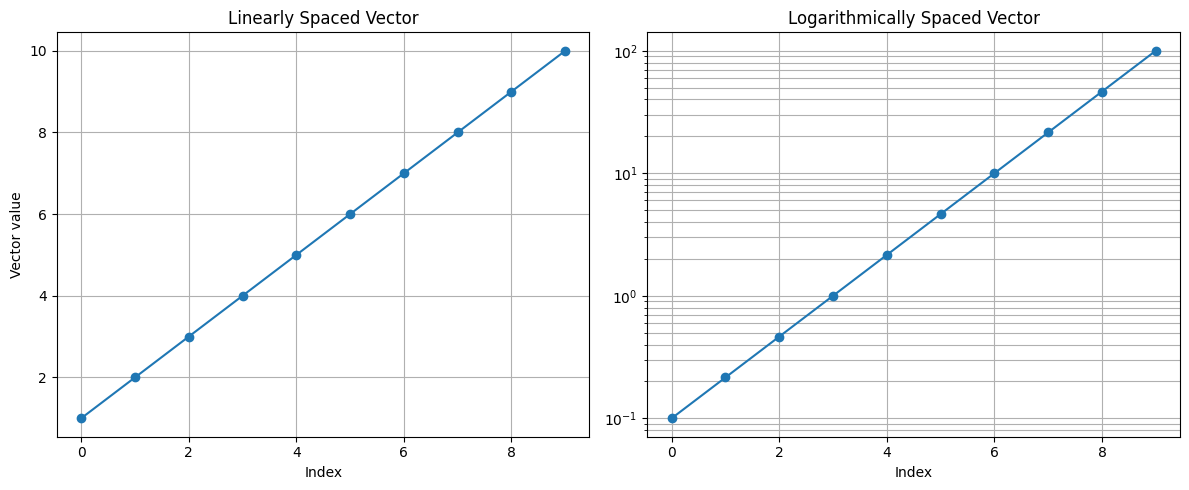

In [6]:
import matplotlib.pyplot as plt

# Plotting: use index versus vector value for clear spacing visualization
indices = np.arange(len(linear_vector))

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Left: Linear spacing plot (linear scale)
ax[0].plot(indices, linear_vector, 'o-', label='linspace')
ax[0].set_title('Linearly Spaced Vector')
ax[0].set_xlabel('Index')
ax[0].set_ylabel('Vector value')
ax[0].grid(True)

# Right: Logarithmic spacing plot (log scale on y-axis)
ax[1].plot(indices, log_vector, 'o-', label='logspace')
ax[1].set_title('Logarithmically Spaced Vector')
ax[1].set_xlabel('Index')
ax[1].set_yscale('log')
ax[1].grid(True, which='both')

plt.tight_layout()
plt.show()

Vectors can be manipulated and acted on as lists:

In [7]:
# Vector addition
v1 = np.array([2,-3, 1])
v2 = np.array([4, 5, 6])
v_sum = v1 + v2
print("v1 + v2:", v_sum)

# Dot product
dot_product = np.dot(v1, v2)
print("Dot product of v and v2:", dot_product)

# Cross product (for 3D vectors)
cross_product = np.cross(v1, v2)
print("Cross product of v and v2:", cross_product)

v1 + v2: [6 2 7]
Dot product of v and v2: -1
Cross product of v and v2: [-23  -8  22]


#### Definition of matrices and elementary algebraic operations

In [8]:
# Define a matrix
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])
print("Matrix A:\n", A)

# We can access the first column of A (note Python indexing):
nth_column = A[:, 0]
print("The first column of A:")
print(np.array(nth_column).reshape(-1,1))

Matrix A:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
The first column of A:
[[1]
 [4]
 [7]]


Now, we show how to:
- Compute the transpose, $A^\mathrm{T}$
- Multiply two matrices (usual matrix product), $C = A B$
- Element-wise multiply two matrices, $D_{ij} = A_{ij} B_{ij}$
- Find the double inner product of two matrices, $A:B = \sum_i\sum_j D_{ij}$

In [9]:
# Transpose of a matrix
A_T = A.T
print("Transpose of A:\n", A_T)

# Usual matrix multiplication
B = np.array([[9, 8, 7],
              [6, 5, 4],
              [3, 2, 1]])
C = np.dot(A, B)
print("A * B:\n", C)

# Element-wise product of matrices:
D = A*B
print("A_ij B_ij:\n", D)

# Double inner product of matrices:
A_double_dot_B = np.sum(D)
print("A:B =",A_double_dot_B)


Transpose of A:
 [[1 4 7]
 [2 5 8]
 [3 6 9]]
A * B:
 [[ 30  24  18]
 [ 84  69  54]
 [138 114  90]]
A_ij B_ij:
 [[ 9 16 21]
 [24 25 24]
 [21 16  9]]
A:B = 165


Identity matrices $I_{n\times n}$ are declared as in Matlab:

In [10]:
n = 5  
identity_matrix = np.eye(n)

print("Identity matrix of size {}x{}:".format(n, n))
print(identity_matrix)

Identity matrix of size 5x5:
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


#### Linear algebra

Matrix determinants, trace, and inverse:

In [11]:
# Define a sample 2x2 matrix A
A = np.array([[4, 7],
              [2, 6]])
print("Matrix A:")
print(A)

# Determinant of A
det_A = np.linalg.det(A)
print("\nDeterminant of A:", det_A)

# Trace of A (sum of diagonal elements)
trace_A = np.trace(A)
print("Trace of A:", trace_A)

# Inverse of A (if A is non-singular)
A_inv = np.linalg.inv(A)
print("\nInverse of A:")
print(A_inv)

# Verify the inverse: A * A_inv should be the identity matrix
identity_check = np.dot(A, A_inv)
print("\nA multiplied by its inverse (should be identity):")
print(identity_check)

Matrix A:
[[4 7]
 [2 6]]

Determinant of A: 10.000000000000002
Trace of A: 10

Inverse of A:
[[ 0.6 -0.7]
 [-0.2  0.4]]

A multiplied by its inverse (should be identity):
[[ 1.00000000e+00 -1.11022302e-16]
 [ 1.11022302e-16  1.00000000e+00]]


Norm and linear systems $A\vec{x} = \vec{b}$:

In [12]:
# Define a vector v
v = np.array([3, 4])
# Compute the Euclidean norm of v
v_norm = np.linalg.norm(v)
print("\nNorm of vector v:", v_norm)

# For matrices, the Frobenius norm is common:
A_norm = np.linalg.norm(A)
print("Frobenius norm of A:", A_norm)

# Solving a linear system A*x = b
b = np.array([1, 0])
x = np.linalg.solve(A, b)
print("\nSolution to A*x = b:")
print(x)


Norm of vector v: 5.0
Frobenius norm of A: 10.246950765959598

Solution to A*x = b:
[ 0.6 -0.2]


Below are two separate code snippets demonstrating how to solve:
- A standard eigenvalue problem: $A \vec{v} = \lambda \vec{v}$
- A generalized eigenvalue problem $A \vec{v} = \lambda B \vec{v}$, where $B$ is nonsingular


In [13]:
import scipy.linalg as la

# Define a sample matrix A
A = np.array([[2, 1],
              [1, 2]])

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)

print("Standard Eigenvalue Problem:")
print("Matrix A:")
print(A)
print("\nEigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)


Standard Eigenvalue Problem:
Matrix A:
[[2 1]
 [1 2]]

Eigenvalues:
[3. 1.]

Eigenvectors:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [14]:
# Define new matrices A and B.
# For a valid generalized eigenvalue problem, B should be non-singular.

A = np.array([[1, 2],
              [3, 4]])
B = np.array([[4, 0],
              [0, 2]])
# Compute generalized eigenvalues and eigenvectors
gen_eigenvalues, gen_eigenvectors = la.eig(A, B)

print("Generalized Eigenvalue Problem:")
print("Matrix A:")
print(A)
print("\nMatrix B:")
print(B)
print("\nGeneralized Eigenvalues:")
print(gen_eigenvalues)
print("\nGeneralized Eigenvectors:")
print(gen_eigenvectors)


Generalized Eigenvalue Problem:
Matrix A:
[[1 2]
 [3 4]]

Matrix B:
[[4 0]
 [0 2]]

Generalized Eigenvalues:
[-0.10610723+0.j  2.35610723+0.j]

Generalized Eigenvectors:
[[ 0.81453066  0.23098477]
 [-0.58012051  0.97295737]]


#### Advanced handling of arrays and matrices

Concatenating Matrices:

In [15]:
# Define another matrix B
B = np.array([[1, 2],
              [3, 4]])

# Horizontal concatenation (side-by-side)
h_concat = np.hstack((A, B))
print("\nHorizontal concatenation of A and B:")
print(h_concat)

# Vertical concatenation (stacking on top of each other)
v_concat = np.vstack((A, B))
print("\nVertical concatenation of A and B:")
print(v_concat)



Horizontal concatenation of A and B:
[[1 2 1 2]
 [3 4 3 4]]

Vertical concatenation of A and B:
[[1 2]
 [3 4]
 [1 2]
 [3 4]]


Block matrices:

In [16]:
# Define smaller matrices
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

# Create a block matrix
block_matrix = np.block([[A, B],
                         [B, A]])
print("\nBlock matrix composed of A and B:")
print(block_matrix)


Block matrix composed of A and B:
[[1 2 5 6]
 [3 4 7 8]
 [5 6 1 2]
 [7 8 3 4]]


Advanced indexing and slicing

In [17]:
# Create a 4x4 matrix
A = np.arange(1, 17).reshape(4, 4)
print("Original matrix A:")
print(A)

# Slicing: Extract a submatrix (rows 1-2, columns 1-2)
sub_matrix = A[1:3, 1:3]
print("\nSliced submatrix (rows 1-2, columns 1-2):")
print(sub_matrix)

# Boolean indexing: Select elements greater than 10
print("\nElements in A greater than 10:")
print(A[A > 10])


Original matrix A:
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]

Sliced submatrix (rows 1-2, columns 1-2):
[[ 6  7]
 [10 11]]

Elements in A greater than 10:
[11 12 13 14 15 16]


Reshaping and flattening arrays

Last, but not least, we create a structured matrix. Let's use as an example the matrix to compute second derivatives in a finite-difference scheme... 

In [18]:
import numpy as np

# Create a 2x6 matrix
B = np.arange(12).reshape(2, 6)
print("Original matrix B:")
print(B)

# Reshape B to a 3x4 matrix
B_reshaped = B.reshape(3, 4)
print("\nReshaped B (3x4):")
print(B_reshaped)

# Flatten the matrix to a 1D array
B_flat = B.flatten()
print("\nFlattened B:")
print(B_flat)

Original matrix B:
[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]]

Reshaped B (3x4):
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

Flattened B:
[ 0  1  2  3  4  5  6  7  8  9 10 11]


#### Miscellaneous

Last, but not least, let's create a matrix with a known structure. We will use as an example a **second-Order Central Finite Difference Matrix**. This matrix approximates the second derivative $u''(x)$ of a function $u(x)$ over a grid $x_i$ using the central finite difference formula:

$$
u''(x_i) \approx \frac{u(x_{i+1}) - 2u(x_i) + u(x_{i-1})}{h^2},
$$

where $h$ is the grid spacing and $n$ is the number of grid points. The matrix is tridiagonal, with $-2$ on the main diagonal and $1$ on the off-diagonals. In its schematic form, the matrix looks like:

$$ D_2 = 
\frac{1}{h^2}\begin{bmatrix}
-2 & 1  & 0  & \cdots & 0 \\
1  & -2 & 1  & \cdots & 0 \\
0  & 1  & -2 & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & 1 \\
0  & 0  & 0  & 1 & -2 \\
\end{bmatrix}.
$$

We will talk about this kind of matrices in more detail in subsequent notebooks.

In [19]:
# Number of grid points (including boundaries)
n = 10

# Grid spacing (example value)
h = 0.1

# Create the main diagonal with -2's
main_diag = -2.0 * np.ones(n)

# Create the off-diagonals with 1's (for the upper and lower diagonals)
off_diag = np.ones(n - 1)

# Construct the tridiagonal finite difference matrix
D2 = np.diag(main_diag) + np.diag(off_diag, k=1) + np.diag(off_diag, k=-1)

# Scale by h^2 to complete the finite difference approximation
D2 = D2 / h**2

print("Second-order central finite difference matrix:\n")
print(D2)

Second-order central finite difference matrix:

[[-200.  100.    0.    0.    0.    0.    0.    0.    0.    0.]
 [ 100. -200.  100.    0.    0.    0.    0.    0.    0.    0.]
 [   0.  100. -200.  100.    0.    0.    0.    0.    0.    0.]
 [   0.    0.  100. -200.  100.    0.    0.    0.    0.    0.]
 [   0.    0.    0.  100. -200.  100.    0.    0.    0.    0.]
 [   0.    0.    0.    0.  100. -200.  100.    0.    0.    0.]
 [   0.    0.    0.    0.    0.  100. -200.  100.    0.    0.]
 [   0.    0.    0.    0.    0.    0.  100. -200.  100.    0.]
 [   0.    0.    0.    0.    0.    0.    0.  100. -200.  100.]
 [   0.    0.    0.    0.    0.    0.    0.    0.  100. -200.]]


We can use the command `spy` to investigate the so-called sparsity pattern of matrix $D_2$:

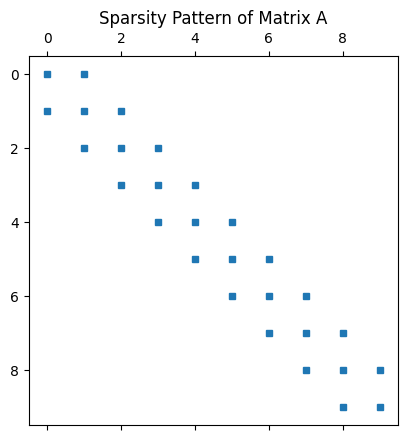

In [21]:
plt.spy(D2, markersize=4)
plt.title("Sparsity Pattern of Matrix A")
plt.show()

In [ ]:
T